In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Fetch historical data
ticker = "NVDA"
period = "3mo"
interval = "1d"
data = yf.download(ticker, period=period, interval=interval)
print(data)

/var/folders/3n/c2cyvjmd52585bcd83mjw9dw0000gp/T/ipykernel_51836/1582047463.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period=period, interval=interval)
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            NVDA        NVDA        NVDA        NVDA       NVDA
Date                                                                 
2025-04-25  111.002296  111.912229  105.722664  106.842582  251064700
2025-04-28  108.722450  110.362336  106.012632  109.682383  207708500
2025-04-29  109.012428  110.192347  107.432544  107.662524  170444300
2025-04-30  108.912437  108.912437  104.072777  104.462749  235044600
2025-05-01  111.602249  114.932020  111.292273  113.072148  236121500
...                ...         ...         ...         ...        ...
2025-07-21  171.380005  173.380005  171.000000  172.750000  123126100
2025-07-22  167.029999  171.389999  164.580002  171.339996  193114300
2025-07-23  170.779999  171.259995  167.970001  169.529999  154082200
2025-07-24  173.740005  173.830002  171.300003  172.440002  128552800
2025-07-25  173.600098  174.720001  172.964996  173.615005   90306367

[63 rows x 5 column

In [5]:
# Calculate percentage change (vectorized)
data["Trend%"] = data["Close"].pct_change() * 100
print(data["Trend%"])

Date
2025-04-25   NaN
2025-04-28   NaN
2025-04-29   NaN
2025-04-30   NaN
2025-05-01   NaN
              ..
2025-07-21   NaN
2025-07-22   NaN
2025-07-23   NaN
2025-07-24   NaN
2025-07-25   NaN
Name: Trend%, Length: 63, dtype: float64


In [15]:
# Vectorized labeling: Use np.where for efficient assignment
data["TrendLabel"] = np.where(data["Trend%"] > 0, "Bullish",
                       np.where(data["Trend%"] < 0, "Bearish", None))



In [16]:
# Show result
print(data[["Close", "Trend%", "TrendLabel"]].tail(10))


Price            Close    Trend% TrendLabel
Ticker            NVDA                     
Date                                       
2025-07-14  164.070007 -0.515396    Bearish
2025-07-15  170.699997  4.040952    Bullish
2025-07-16  171.369995  0.392500    Bullish
2025-07-17  173.000000  0.951161    Bullish
2025-07-18  172.410004 -0.341038    Bearish
2025-07-21  171.380005 -0.597412    Bearish
2025-07-22  167.029999 -2.538223    Bearish
2025-07-23  170.779999  2.245106    Bullish
2025-07-24  173.740005  1.733228    Bullish
2025-07-25  173.600098 -0.080527    Bearish


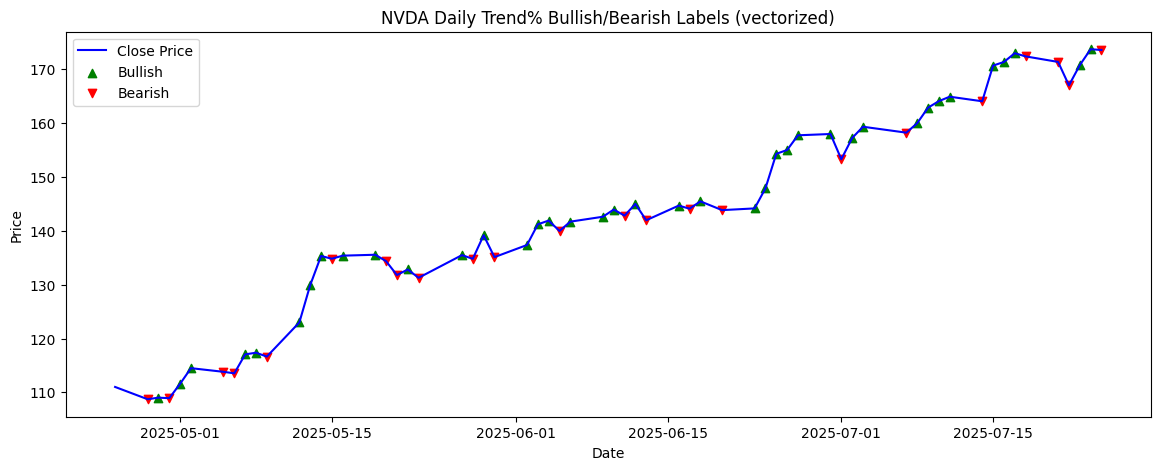

In [17]:

# Optional: visualization as before
plt.figure(figsize=(14,5))
plt.plot(data.index, data["Close"], label="Close Price", color="blue")
plt.scatter(data.index[data["TrendLabel"] == "Bullish"], data["Close"][data["TrendLabel"] == "Bullish"], color='green', marker='^', label="Bullish")
plt.scatter(data.index[data["TrendLabel"] == "Bearish"], data["Close"][data["TrendLabel"] == "Bearish"], color='red', marker='v', label="Bearish")
plt.title(f"{ticker} Daily Trend% Bullish/Bearish Labels (vectorized)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()
